In [56]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline
 

In [2]:

import warnings
warnings.filterwarnings('ignore')

In [58]:
import numpy as np
import pandas as pd
from helper import TelecomHelper
from clean_telecom_data import CleanTelecomData


In [5]:
CSV_PATH = "D:/10 Academy/data.csv"

In [8]:
# this helper class has utility function we are going to use
Helper = TelecomHelper()


In [10]:
df = Helper.read_csv(CSV_PATH)

file read as csv


In [11]:
pd.set_option('max_column', None)

In [12]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [13]:
def convert_labels(df):
        df.columns = [column.replace(' ', '_').lower() for column in df.columns]
        return df

In [14]:
df = convert_labels(df)

In [15]:
class OverViewAnalysis:
    
    def __init__(self, df):
        
        self.df = df
    
    
    def read_head(self, top=5):
        return self.df.head(top)
    
    # returning the number of rows columns and column information
    def get_info(self):
        row_count, col_count = self.df.shape
    
        print(f"Number of rows: {row_count}")
        print(f"Number of columns: {col_count}")
        print("================================")

        return (row_count, col_count), self.df.info()
    
    # gets number of distnict values in a given coumn
    def get_count(self, column_name):
        return self.df[column_name].value_counts()
    
    def get_null_count(self, column_name):
        print("Null values count")
        print(self.df.isnull().sum())
        return self.df.isnull().sum()
    
    def get_percent_missing(self):
        Helper = TelecomHelper()
        
        percent_missing = Helper.percent_missing(self.df)
        
        null_percent_df = pd.DataFrame(columns = ['column', 'null_percent'])
        columns = self.df.columns.values.tolist()
        
        null_percent_df['column'] = columns
        null_percent_df['null_percent'] = null_percent_df['column'].map(lambda x: Helper.percent_missing_for_col(self.df, x))
        
        
        return null_percent_df.sort_values(by=['null_percent'], ascending = False), percent_missing
    
    
    def top_handset_type(self, top=5):
        
        return self.df['handset_type'].value_counts().head(top)
    
    def top_manufacturer(self, top=5):
        
        return self.df['handset_manufacturer'].value_counts().head(top)
    
    def top_handset_by_manufacturer(self, manufacturer, top=5):
        
        return df.groupby('handset_manufacturer')['handset_type'].value_counts()[manufacturer].head(top)

In [16]:
overViewAnal = OverViewAnalysis(df)

In [17]:

overViewAnal.read_head()

,bearer_id,start,start_ms,end,end_ms,dur._(ms),imsi,msisdn/number,imei,last_location_name,avg_rtt_dl_(ms),avg_rtt_ul_(ms),avg_bearer_tp_dl_(kbps),avg_bearer_tp_ul_(kbps),tcp_dl_retrans._vol_(bytes),tcp_ul_retrans._vol_(bytes),dl_tp_<_50_kbps_(%),50_kbps_<_dl_tp_<_250_kbps_(%),250_kbps_<_dl_tp_<_1_mbps_(%),dl_tp_>_1_mbps_(%),ul_tp_<_10_kbps_(%),10_kbps_<_ul_tp_<_50_kbps_(%),50_kbps_<_ul_tp_<_300_kbps_(%),ul_tp_>_300_kbps_(%),http_dl_(bytes),http_ul_(bytes),activity_duration_dl_(ms),activity_duration_ul_(ms),dur._(ms).1,handset_manufacturer,handset_type,nb_of_sec_with_125000b_<_vol_dl,nb_of_sec_with_1250b_<_vol_ul_<_6250b,nb_of_sec_with_31250b_<_vol_dl_<_125000b,nb_of_sec_with_37500b_<_vol_ul,nb_of_sec_with_6250b_<_vol_dl_<_31250b,nb_of_sec_with_6250b_<_vol_ul_<_37500b,nb_of_sec_with_vol_dl_<_6250b,nb_of_sec_with_vol_ul_<_1250b,social_media_dl_(bytes),social_media_ul_(bytes),google_dl_(bytes),google_ul_(bytes),email_dl_(bytes),email_ul_(bytes),youtube_dl_(bytes),youtube_ul_(bytes),netflix_dl_(bytes),netflix_ul_(bytes),gaming_dl_(bytes),gaming_ul_(bytes),other_dl_(bytes),other_ul_(bytes),total_ul_(bytes),total_dl_(bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [18]:
overViewAnal.get_info()

Number of rows: 150001
Number of columns: 55
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   bearer_id                                 149010 non-null  float64
 1   start                                     150000 non-null  object 
 2   start_ms                                  150000 non-null  float64
 3   end                                       150000 non-null  object 
 4   end_ms                                    150000 non-null  float64
 5   dur._(ms)                                 150000 non-null  float64
 6   imsi                                      149431 non-null  float64
 7   msisdn/number                             148935 non-null  float64
 8   imei                                      149429 non-null  float64
 9   last_location_name                        14884

((150001, 55), None)

In [19]:
df.isnull().sum()

bearer_id                                      991
start                                            1
start_ms                                         1
end                                              1
end_ms                                           1
dur._(ms)                                        1
imsi                                           570
msisdn/number                                 1066
imei                                           572
last_location_name                            1153
avg_rtt_dl_(ms)                              27829
avg_rtt_ul_(ms)                              27812
avg_bearer_tp_dl_(kbps)                          1
avg_bearer_tp_ul_(kbps)                          1
tcp_dl_retrans._vol_(bytes)                  88146
tcp_ul_retrans._vol_(bytes)                  96649
dl_tp_<_50_kbps_(%)                            754
50_kbps_<_dl_tp_<_250_kbps_(%)                 754
250_kbps_<_dl_tp_<_1_mbps_(%)                  754
dl_tp_>_1_mbps_(%)             

In [20]:
null_percent_df, overall_missing = overViewAnal.get_percent_missing()
print(f"The overall missing perceentage is: {overall_missing}%")
print("=============================================")
null_percent_df

The overall missing perceentage is: 12.5%


,column,null_percent
34,nb_of_sec_with_37500b_<_vol_ul,86.84
36,nb_of_sec_with_6250b_<_vol_ul_<_37500b,74.56
31,nb_of_sec_with_125000b_<_vol_dl,65.02
15,tcp_ul_retrans._vol_(bytes),64.43
33,nb_of_sec_with_31250b_<_vol_dl_<_125000b,62.39
32,nb_of_sec_with_1250b_<_vol_ul_<_6250b,61.93
35,nb_of_sec_with_6250b_<_vol_dl_<_31250b,58.88
14,tcp_dl_retrans._vol_(bytes),58.76
25,http_ul_(bytes),54.54
24,http_dl_(bytes),54.32


In [21]:
cleanTelecomData = CleanTelecomData(df)

Automation in Action...!!!


In [22]:
cleaned_df = cleanTelecomData.drop_columns_with_null_values(df)

cleaned_df = cleanTelecomData.convert_to_datetime(cleaned_df)

cleaned_df = cleanTelecomData.drop_duplicate(cleaned_df)

cleaned_df = cleanTelecomData.drop_rows_with_null_values(cleaned_df)

cleaned_df = cleanTelecomData.handle_missing_qantitative_data_with_mean(cleaned_df)



overViewAnal_2 = OverViewAnalysis(cleaned_df)

In [23]:

null_percent_df, overall_missing = overViewAnal_2.get_percent_missing()
print(f"The overall missing perceentage is: {overall_missing}%")
print("=============================================")

The overall missing perceentage is: 0.0%


In [24]:
print(f"percent of null value rows in last_location_name column: {Helper.percent_missing_for_col(cleaned_df, 'last_location_name')}%"
     )
print(f"percent of null value rows in handset_manufacturer: {Helper.percent_missing_for_col(cleaned_df, 'handset_manufacturer')}%")
print(f"percent of null value rows in handset_type: {Helper.percent_missing_for_col(cleaned_df, 'handset_type')}%")
print(f"percent of null value rows in start: {Helper.percent_missing_for_col(cleaned_df, 'start')}%")
print(f"percent of null value rows in end: {Helper.percent_missing_for_col(cleaned_df, 'end')}%")

percent of null value rows in last_location_name column: 0.0%
percent of null value rows in handset_manufacturer: 0.0%
percent of null value rows in handset_type: 0.0%
percent of null value rows in start: 0.0%
percent of null value rows in end: 0.0%


In [25]:
overViewAnal.top_handset_type(top=10)

Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: handset_type, dtype: int64

In [26]:
overViewAnal.top_manufacturer(top=3)

Apple      59565
Samsung    40839
Huawei     34423
Name: handset_manufacturer, dtype: int64

In [27]:
overViewAnal.top_handset_by_manufacturer('Apple', 5)

handset_type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: handset_type, dtype: int64

In [28]:
overViewAnal.top_handset_by_manufacturer('Samsung', 5)

handset_type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: handset_type, dtype: int64

In [29]:
overViewAnal.top_handset_by_manufacturer('Huawei', 5)

handset_type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: handset_type, dtype: int64

In [30]:
cleaned_df['bearer_id'].isnull().any()
print(f"percent missing for bearer_id is:{Helper.percent_missing_for_col(cleaned_df, 'bearer_id')}")

percent missing for bearer_id is:0.0


In [31]:
print(f"percent missing for msisdn/number is:{Helper.percent_missing_for_col(cleaned_df, 'msisdn/number')}")

percent missing for msisdn/number is:0.0


In [32]:

cleaned_df = cleaned_df.dropna(subset=['msisdn/number'])
print(f"percent missing for msisdn/number is:{Helper.percent_missing_for_col(cleaned_df, 'msisdn/number')}")

percent missing for msisdn/number is:0.0


In [33]:
sessions = cleaned_df.groupby('msisdn/number').agg({'bearer_id': 'count'})
sessions = sessions.rename(columns= {'bearer_id': 'xDR_sessions'})
sessions.sort_values(by=['xDR_sessions'], ascending = False).head(10)

,xDR_sessions
msisdn/number,
3.362632e+10,18
3.361489e+10,17
3.362578e+10,17
3.365973e+10,16
3.367588e+10,15
3.376054e+10,15
3.366716e+10,13
3.360313e+10,12
3.376041e+10,12


In [34]:
print(f"percent missing for dur._(ms) is:{Helper.percent_missing_for_col(cleaned_df, 'dur._(ms)')}")

percent missing for dur._(ms) is:0.0


In [35]:
durations = cleaned_df.groupby('msisdn/number').agg({'dur._(ms)': 'sum'})
#here is the duration for first five rows in our dataset
durations=durations.rename(columns= {'dur._(ms)': 'total_duration(ms)'})
durations.sort_values(by=['total_duration(ms)'], ascending = False).head(10)

,total_duration(ms)
msisdn/number,
3.362578e+10,18553754.0
3.361489e+10,9966898.0
3.376054e+10,9279434.0
3.362632e+10,8791927.0
3.366716e+10,8744914.0
3.366469e+10,6288730.0
3.360313e+10,6287761.0
3.366746e+10,5649882.0
3.376041e+10,5321667.0


In [36]:
total_data_df = cleaned_df[['msisdn/number','total_ul_(bytes)','total_dl_(bytes)']].copy()
total_data_df = total_data_df.groupby('msisdn/number').sum()
total_data_df['total_data(bytes)'] = total_data_df['total_ul_(bytes)'] + total_data_df['total_dl_(bytes)']
total_data_df.sort_values(by=['total_data(bytes)'], ascending = False).head(10)

,total_ul_(bytes),total_dl_(bytes),total_data(bytes)
msisdn/number,,,
3.361489e+10,689483001.0,8.156743e+09,8.846226e+09
3.376054e+10,703478581.0,7.811295e+09,8.514774e+09
3.362578e+10,729577380.0,7.770043e+09,8.499621e+09
3.362632e+10,669650721.0,7.301517e+09,7.971167e+09
3.367588e+10,581568792.0,7.309542e+09,7.891111e+09
3.365973e+10,624260321.0,7.081602e+09,7.705863e+09
3.366646e+10,405060976.0,6.903440e+09,7.308501e+09
3.376041e+10,521518890.0,6.610852e+09,7.132371e+09
3.366471e+10,471244453.0,6.400774e+09,6.872018e+09


In [37]:
cleaned_df["social_media"] = cleaned_df["social_media_dl_(bytes)"] + cleaned_df['social_media_ul_(bytes)']
cleaned_df["google"] = cleaned_df["google_dl_(bytes)"] + cleaned_df["google_ul_(bytes)"]
cleaned_df['email'] = cleaned_df["email_dl_(bytes)"] + cleaned_df["email_ul_(bytes)"]
cleaned_df['youtube'] = cleaned_df["youtube_dl_(bytes)"] + cleaned_df["youtube_ul_(bytes)"]
cleaned_df['netflix'] = cleaned_df["netflix_dl_(bytes)"] + cleaned_df["netflix_ul_(bytes)"]
cleaned_df["gaming"] = cleaned_df["gaming_dl_(bytes)"] + cleaned_df["gaming_ul_(bytes)"]
cleaned_df['other']= cleaned_df["other_dl_(bytes)"]+ cleaned_df["other_ul_(bytes)"]
cleaned_df['total_data'] = cleaned_df['total_dl_(bytes)'] + cleaned_df['total_ul_(bytes)']

In [38]:
app_total_data = cleaned_df[['msisdn/number','social_media','google',
                             'email', 'youtube','netflix', 'gaming','other']].copy()

In [39]:

app_total_data.groupby('msisdn/number').sum().sample(10)

,social_media,google,email,youtube,netflix,gaming,other
msisdn/number,,,,,,,
3.361426e+10,230510.0,7213906.0,3664848.0,21908558.0,23048447.0,7.500013e+08,3.100953e+08
3.366190e+10,3123520.0,8777172.0,3674173.0,19019634.0,27151264.0,4.022388e+08,3.128550e+08
3.366214e+10,3424198.0,3498748.0,1753402.0,32391767.0,21479571.0,4.837936e+08,4.973319e+08
3.361692e+10,3485499.0,8917182.0,1943263.0,11988923.0,24194067.0,4.488447e+08,4.455960e+08
3.362431e+10,924741.0,6118517.0,3408749.0,37629834.0,16085942.0,1.219436e+08,8.578975e+08
3.362340e+10,312163.0,4694620.0,1454230.0,18351517.0,21407826.0,2.442144e+08,8.304477e+08
3.369855e+10,6323887.0,35624288.0,8955670.0,107936704.0,78904875.0,8.564722e+08,1.836059e+09
3.361238e+10,261813.0,5166268.0,3395651.0,18990145.0,12760468.0,5.814549e+08,6.951139e+08
3.362725e+10,4450601.0,20319400.0,4632741.0,52455597.0,27836175.0,1.442544e+09,5.220219e+08


In [42]:
SAVE_PATH = "../data/cleaned_data.csv"

In [43]:
cleaned_df =Helper.save_csv(cleaned_df, SAVE_PATH)

File Successfully Saved.!!!


In [44]:
Helper.percent_missing(cleaned_df)

0.0

In [45]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146891 entries, 0 to 149999
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   bearer_id                       146891 non-null  float64       
 1   start                           146891 non-null  datetime64[ns]
 2   start_ms                        146891 non-null  float64       
 3   end                             146891 non-null  datetime64[ns]
 4   end_ms                          146891 non-null  float64       
 5   dur._(ms)                       146891 non-null  float64       
 6   imsi                            146891 non-null  float64       
 7   msisdn/number                   146891 non-null  float64       
 8   imei                            146891 non-null  float64       
 9   last_location_name              146891 non-null  object        
 10  avg_rtt_dl_(ms)                 146891 non-null  float64

## scaling data 

In [46]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

# generate 1000 data points randomly drawn from an exponential distribution
original_data = pd.DataFrame(np.random.exponential(200, size=2000))

original_data.sample(5)

,0
74,114.884974
211,114.280356
1353,134.884658
177,210.968439
984,59.186256


In [47]:
original_data[0].min(), original_data[0].max()

(0.04674248567188065, 1396.3209429581975)

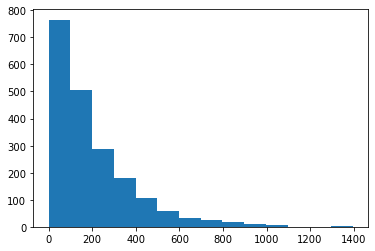

In [48]:
count, bins, ignored = plt.hist(original_data, 14)
plt.show()

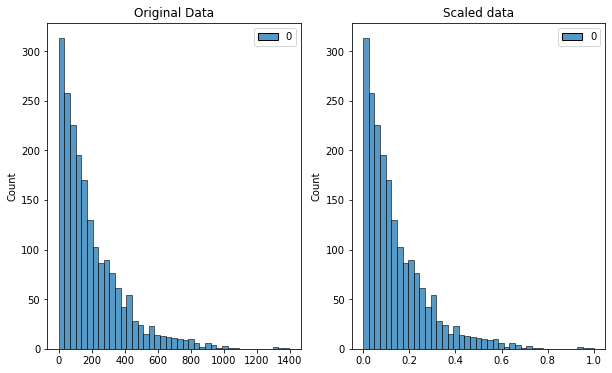

In [49]:
# mix-max scale the data between 0 and 1
def scaler(df):
    scaled_data = minmax_scaler.fit_transform(df)

    # plot both together to compare
    fig, ax = plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(original_data, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(scaled_data, ax=ax[1])
    ax[1].set_title("Scaled data")
    
scaler(original_data)

## Normalization

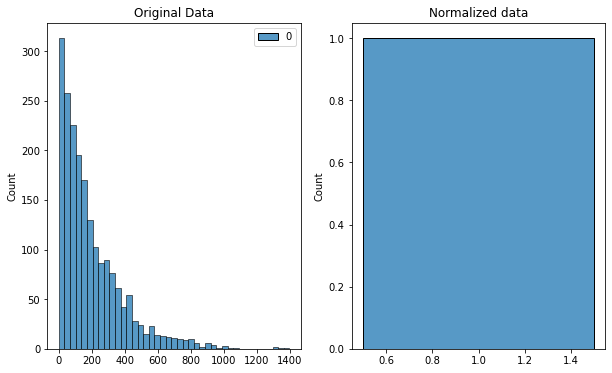

In [50]:
from sklearn.preprocessing import Normalizer

def normalizer(df):
    norm = Normalizer()
    # normalize the exponential data with boxcox
    normalized_data = norm.fit_transform(df)

    # plot both together to compare
    fig, ax=plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(df, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(normalized_data[0], ax=ax[1])
    ax[1].set_title("Normalized data")

normalizer(original_data)

In [53]:
df_clean = cleaned_df

In [64]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146891 entries, 0 to 149999
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   bearer_id                       146891 non-null  float64       
 1   start                           146891 non-null  datetime64[ns]
 2   start_ms                        146891 non-null  float64       
 3   end                             146891 non-null  datetime64[ns]
 4   end_ms                          146891 non-null  float64       
 5   dur._(ms)                       146891 non-null  float64       
 6   imsi                            146891 non-null  float64       
 7   msisdn/number                   146891 non-null  float64       
 8   imei                            146891 non-null  float64       
 9   last_location_name              146891 non-null  object        
 10  avg_rtt_dl_(ms)                 146891 non-null  float64

# User Engagement Analysis

In [67]:
renamed_df = cleaned_df(columns={'msisdn/number': 'msisdn', 'dur._(ms)': 'duration' })

TypeError: 'DataFrame' object is not callable

In [72]:
pd.set_option('max_column', None)
pd.options.display.float_format = "{:.6f}".format

In [73]:
CSV_PATH = "../data/cleaned_data.csv"

In [74]:
TelecomHelper = TelecomHelper()

In [75]:
df = TelecomHelper.read_csv(csv_path=CSV_PATH)

file read as csv


In [76]:
print(f"The percentage of data missing is: {TelecomHelper.percent_missing(df)}")

The percentage of data missing is: 0.0


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146891 entries, 0 to 146890
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   bearer_id                       146891 non-null  float64
 1   start                           146891 non-null  object 
 2   start_ms                        146891 non-null  float64
 3   end                             146891 non-null  object 
 4   end_ms                          146891 non-null  float64
 5   dur._(ms)                       146891 non-null  float64
 6   imsi                            146891 non-null  float64
 7   msisdn/number                   146891 non-null  float64
 8   imei                            146891 non-null  float64
 9   last_location_name              146891 non-null  object 
 10  avg_rtt_dl_(ms)                 146891 non-null  float64
 11  avg_rtt_ul_(ms)                 146891 non-null  float64
 12  avg_bearer_tp_dl

In [68]:
renamed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   bearer_id                                 149010 non-null  float64
 1   start                                     150000 non-null  object 
 2   start_ms                                  150000 non-null  float64
 3   end                                       150000 non-null  object 
 4   end_ms                                    150000 non-null  float64
 5   duration                                  150000 non-null  float64
 6   imsi                                      149431 non-null  float64
 7   msisdn                                    148935 non-null  float64
 8   imei                                      149429 non-null  float64
 9   last_location_name                        148848 non-null  object 
 10  avg_rtt_dl_(ms)     

In [69]:
agg_by_session_count = renamed_df.groupby('msisdn').agg({'bearer_id': 'count'})
session_freq_metrics = agg_by_session_count.sort_values(by=['bearer_id'], ascending = False)
session_freq_metrics.head(10)

,bearer_id
msisdn,
3.362632e+10,18
3.362578e+10,17
3.361489e+10,17
3.365973e+10,16
3.367588e+10,15
3.376054e+10,15
3.366716e+10,13
3.376041e+10,12
3.360452e+10,12


In [70]:
agg_by_duration = renamed_df.groupby('msisdn').agg({'duration': 'sum'})
duration_metrics = agg_by_duration.sort_values(by=['duration'], ascending = False)
duration_metrics.head(10)

,duration
msisdn,
3.362578e+10,18553754.0
3.361489e+10,9966898.0
3.376054e+10,9279434.0
3.362632e+10,8791927.0
3.366716e+10,8744914.0
3.366284e+10,6614270.0
3.366469e+10,6288730.0
3.360313e+10,6287761.0
3.366746e+10,5649882.0


In [71]:
agg_by_data = renamed_df.groupby('msisdn').agg({'total_data': 'sum'})
traffic_metric = agg_by_data.sort_values(by=['total_data'], ascending = False)
traffic_metric.head(10)

SpecificationError: Column(s) ['total_data'] do not exist